# Screen Time Analysis 

Screen Time Analysis is the task of analyzing and creating a report on which applications and websites are used by the user for how much time.

The dataset used for Screen Time analysis : https://www.kaggle.com/datasets/ruchi798/analyzing-screen-time.

---

1. Import Libraries
2. Descriptive statistics of data
3. Data visualization
---

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
data = pd.read_csv(r"Screentime-App-Details.csv")

In [3]:
data.head(5)

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


## 2. Desciptive Statistics

In [18]:
# Checking for the nulll values
data.isnull().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


The dataset doesn't have any null values. 

In [19]:
# Statistical Parameters
data.describe()

,Usage,Notifications,Times opened
count,54.000000,54.000000,54.000000
mean,65.037037,117.703704,61.481481
std,58.317272,97.017530,43.836635
min,1.000000,8.000000,2.000000
25%,17.500000,25.750000,23.500000
50%,58.500000,99.000000,62.500000
75%,90.500000,188.250000,90.000000
max,244.000000,405.000000,192.000000


## 3. Data Visualization

### 3.1 Usage of Apps

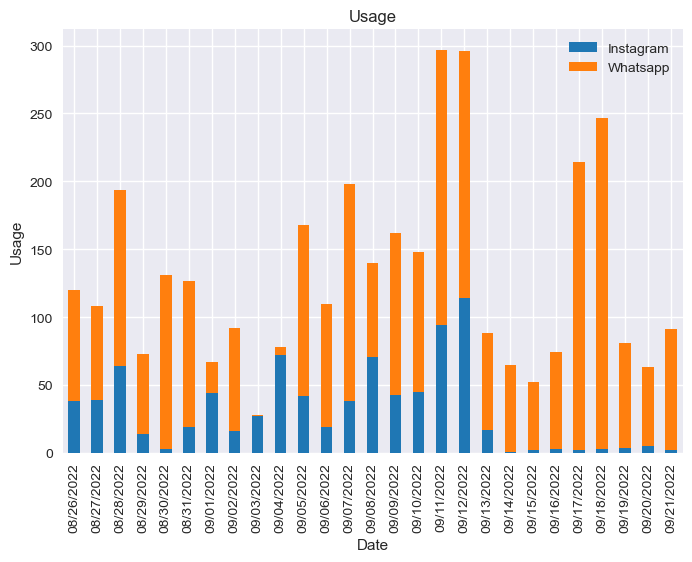

In [25]:
# Analysisng Usage of Apps

# Pivot the data to create a stacked bar chart
pivot_data = data.pivot(index='Date', columns='App', values='Usage')

# Plot
fig, ax = plt.subplots(1,1)
pivot_data.plot(kind='bar', stacked=True, ax=ax)                              # color=['skyblue','lightpink']
ax.set_xlabel('Date')
ax.set_ylabel('Usage')
plt.title('Usage')
plt.legend()
plt.show()

### 3.2 Notifications

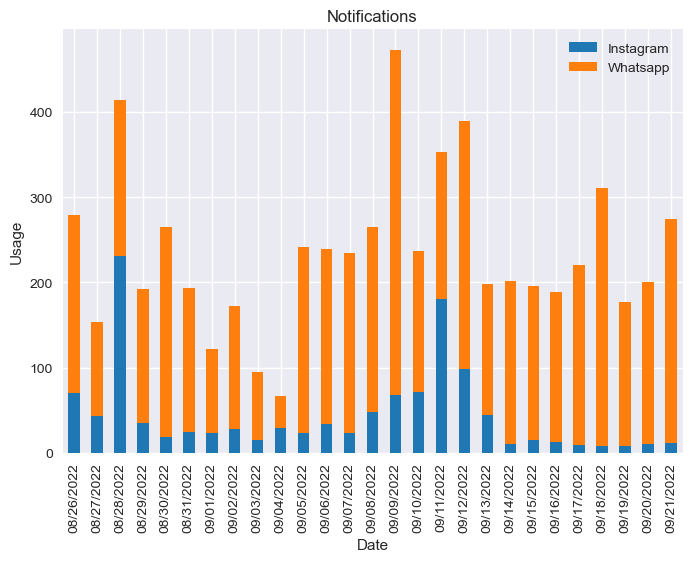

In [26]:
# Analysing Notifications
pivot_data = data.pivot(index='Date', columns='App', values='Notifications')

# Plot
fig, ax = plt.subplots()
pivot_data.plot(kind='bar', stacked=True, ax=ax)                              # color=['skyblue','lightpink']
ax.set_xlabel('Date')
ax.set_ylabel('Usage')
plt.title('Notifications')
plt.legend()
plt.show()

### 3.3 Times Opened

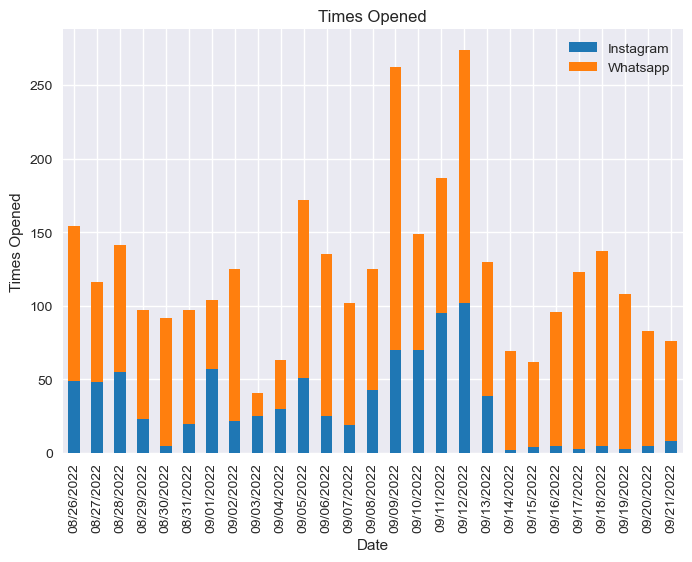

In [27]:
# Analysing Times Opened

pivot_data = data.pivot(index='Date', columns='App', values='Times opened')

# Plot
fig, ax = plt.subplots()
pivot_data.plot(kind='bar', stacked=True, ax=ax)                              # color=['skyblue','lightpink']
ax.set_xlabel('Date')
ax.set_ylabel('Times Opened')
plt.title('Times Opened')
plt.legend()
plt.show()

Generally we use our smartphones when we get notified by any application. 
Let's take a look at the relationship between the number of notifications and the amount of usage.

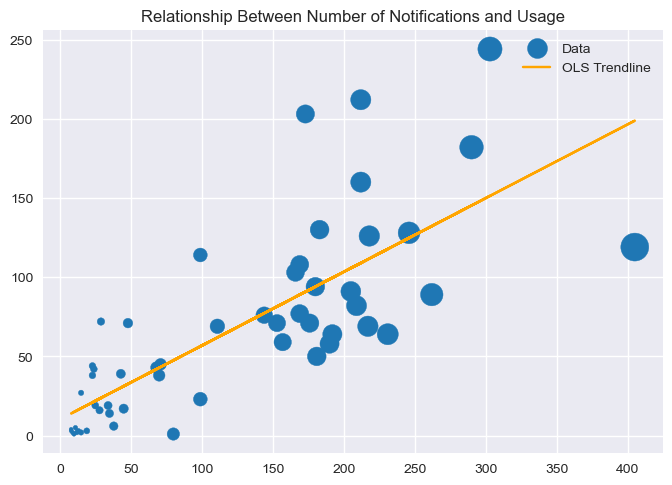

In [32]:

# Add a constant term to the independent variable
x = sm.add_constant(data['Notifications'])

# Fit an OLS regression model
model = sm.OLS(data['Usage'], x).fit()

# Get the OLS regression line
predictions = model.predict(x)

# Create a scatter plot
plt.scatter(data['Notifications'], data['Usage'], s=data['Notifications'], label="Data")
# Plot the OLS regression line
plt.plot(data['Notifications'], predictions, color='orange', label="OLS Trendline")

plt.title("Relationship Between Number of Notifications and Usage")
plt.legend()
plt.show()


There is a linear relationship between the number of notifications and the amount of usage.

Conclusion : More notification from different app result in more use of smartphones.